## Test individual

inf
inf
[[84  0]
 [ 0  0]]
coef_: [1.3 0. ] intercept_:3.8000000000000007


Text(0.5, 0, 'Y')

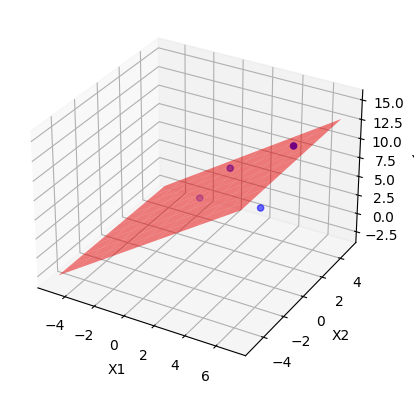

In [1]:
import numpy as np

x_train = np.asarray([[1, 0], [3, 0], [5, 0], [7, 0]])
y_train = np.asarray([5, 10, 6, 15])

print(np.linalg.cond(x_train))
print(np.linalg.cond(x_train.T @ x_train))
print(x_train.T @ x_train)

import matplotlib.pyplot as plt
import sklearn.linear_model
linReg = sklearn.linear_model.LinearRegression()

linReg.fit(x_train, y_train)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# scatter plot of the data
ax.scatter(x_train[:, 0], x_train[:, 1], y_train, color='b')

# prediction over the train samples
y_pred = linReg.predict(x_train)
# Create a grid of points at which to evaluate the model
x1 = np.linspace(min(min(x_train[:, 0]), -5), max(max(x_train[:, 0]), 5), num=10)
x2 = np.linspace(min(min(x_train[:, 1]), -5), max(max(x_train[:, 1]), 5), num=10)
x1, x2 = np.meshgrid(x1, x2)
Y = linReg.coef_[0]*x1 + linReg.coef_[1]*x2 + linReg.intercept_

print(f"coef_: {linReg.coef_} intercept_:{linReg.intercept_}")
# Plot the model's estimated plane
ax.plot_surface(x1, x2, Y, color='r', alpha=0.5)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')


In [2]:
# Test OLS cond number thingy
import numpy as np

X = np.load('X.npy')
Y = np.load('Y.npy')

np.all(np.isfinite(X)), np.all(np.isfinite(Y))

(True, True)

In [3]:
import sklearn.linear_model
linReg = sklearn.linear_model.LinearRegression()

linReg.fit(X, Y)

LinearRegression()

In [4]:
linReg.coef_

array([ 6.00838684e-11, -7.91295740e-14, -1.35772556e-12, -1.12872385e-13,
        8.97205487e-14, -8.66225494e-14,  3.01605373e-11,  8.24598376e-11,
        6.49235440e-14,  1.94173345e-13,  6.69561791e-14, -2.61948666e-14,
        5.57549341e-14, -6.37470762e-14,  4.08997922e-14,  3.46033965e-14,
       -9.52493293e-15, -2.38663256e-14, -1.39619219e-14,  4.69242700e-15,
       -1.59650938e-14, -7.32313515e-15, -2.88384767e-14,  1.08918950e-14,
       -1.62387465e-14,  3.62700321e-14,  1.24813354e-15,  1.59147868e-14,
       -2.02163048e-15,  1.73411632e-14, -5.58580959e-15,  6.20467219e-15,
       -7.13648975e-16, -1.74773390e-16, -3.73995539e-16, -3.13334428e-17,
       -2.39088263e-15,  2.11376056e-15,  7.78023479e-16,  1.65058939e-15,
       -1.02348685e-16,  5.96744876e-16,  3.12250226e-16,  8.32667268e-16,
       -4.05925293e-16, -1.10675358e-15, -8.18789481e-16,  3.33760797e-15,
        1.22471477e-15,  2.87790625e-15,  1.57165947e-15,  1.73472348e-15,
       -5.12610787e-16,  

In [5]:
linReg.rank_

80

In [6]:
linReg.singular_

array([2.0889696e+12, 3.8470756e+11, 3.0699320e+11, 2.4576988e+11,
       1.4428537e+11, 1.3574990e+11, 1.1069692e+11, 1.0684361e+11,
       9.5306031e+10, 8.1847984e+10, 6.9603140e+10, 6.6544075e+10,
       6.2038077e+10, 5.4217957e+10, 5.1236246e+10, 4.7357923e+10,
       4.4344185e+10, 4.2207216e+10, 3.5201094e+10, 3.1535667e+10,
       2.3524450e+10, 2.1630409e+10, 2.0966566e+10, 1.9784354e+10,
       1.4987794e+10, 1.4538830e+10, 1.3811479e+10, 1.2934319e+10,
       1.1916799e+10, 1.1440413e+10, 1.0654010e+10, 9.7196554e+09,
       9.2367104e+09, 8.5147909e+09, 8.2976154e+09, 7.8595630e+09,
       7.4367201e+09, 7.1271173e+09, 6.1506821e+09, 5.9518996e+09,
       5.5371254e+09, 4.8502748e+09, 4.6634824e+09, 4.4052065e+09,
       4.1707244e+09, 3.9755940e+09, 3.8427026e+09, 3.7234476e+09,
       3.4178291e+09, 3.2075602e+09, 3.0484700e+09, 2.8855757e+09,
       2.7567578e+09, 2.4495657e+09, 2.3839401e+09, 1.8934043e+09,
       1.7827729e+09, 1.3737924e+09, 1.3347429e+09, 1.3020680e

In [7]:
Y_pred = linReg.predict(X)

fps_real = 1.0 / Y
fps_pred = 1.0 / Y_pred

mse = sklearn.metrics.mean_squared_error(fps_real, fps_pred)
mae = sklearn.metrics.mean_absolute_error(fps_real, fps_pred)
mape = sklearn.metrics.mean_absolute_percentage_error(fps_real, fps_pred)
print(f"mse={mse} mae={mae} mape={mape}")

mseOrig = sklearn.metrics.mean_squared_error(Y, Y_pred)
maeOrig = sklearn.metrics.mean_absolute_error(Y, Y_pred)
mapeOrig = sklearn.metrics.mean_absolute_percentage_error(Y, Y_pred)
print(f"mseOrig={mseOrig} maeOrig={maeOrig} mapeOrig={mapeOrig}")

mse=6189414875136.0 mae=69323.9921875 mape=10.183971405029297
mseOrig=0.00010012630082201213 maeOrig=0.0024640141054987907 mapeOrig=0.9937332272529602


In [23]:
linReg.fit(X, Y, (1 / Y + 1e-6))

LinearRegression()

In [24]:
Y_pred = linReg.predict(X)

fps_real = 1.0 / Y
fps_pred = 1.0 / Y_pred

mse = sklearn.metrics.mean_squared_error(fps_real, fps_pred)
mae = sklearn.metrics.mean_absolute_error(fps_real, fps_pred)
mape = sklearn.metrics.mean_absolute_percentage_error(fps_real, fps_pred)
print(f"mse={mse} mae={mae} mape={mape}")

mseOrig = sklearn.metrics.mean_squared_error(Y, Y_pred)
maeOrig = sklearn.metrics.mean_absolute_error(Y, Y_pred)
mapeOrig = sklearn.metrics.mean_absolute_percentage_error(Y, Y_pred)
print(f"mseOrig={mseOrig} maeOrig={maeOrig} mapeOrig={mapeOrig}")

mse=164414636032.0 mae=4880.4443359375 mape=4.2558064460754395
mseOrig=0.00016592360043432564 maeOrig=0.0024286366533488035 mapeOrig=0.3513575792312622
